<a href="https://colab.research.google.com/github/gceltbdc/Movie_Recommendation_Project/blob/main/movie_recommendation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from zipfile import ZipFile

In [3]:
with ZipFile('/content/movie_metadata.csv.zip', 'r') as zip_ref:
   zip_ref.extractall()

In [4]:
data = pd.read_csv('/content/movie_metadata.csv')

In [5]:
data.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [7]:
data.shape

(5043, 28)

In [6]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

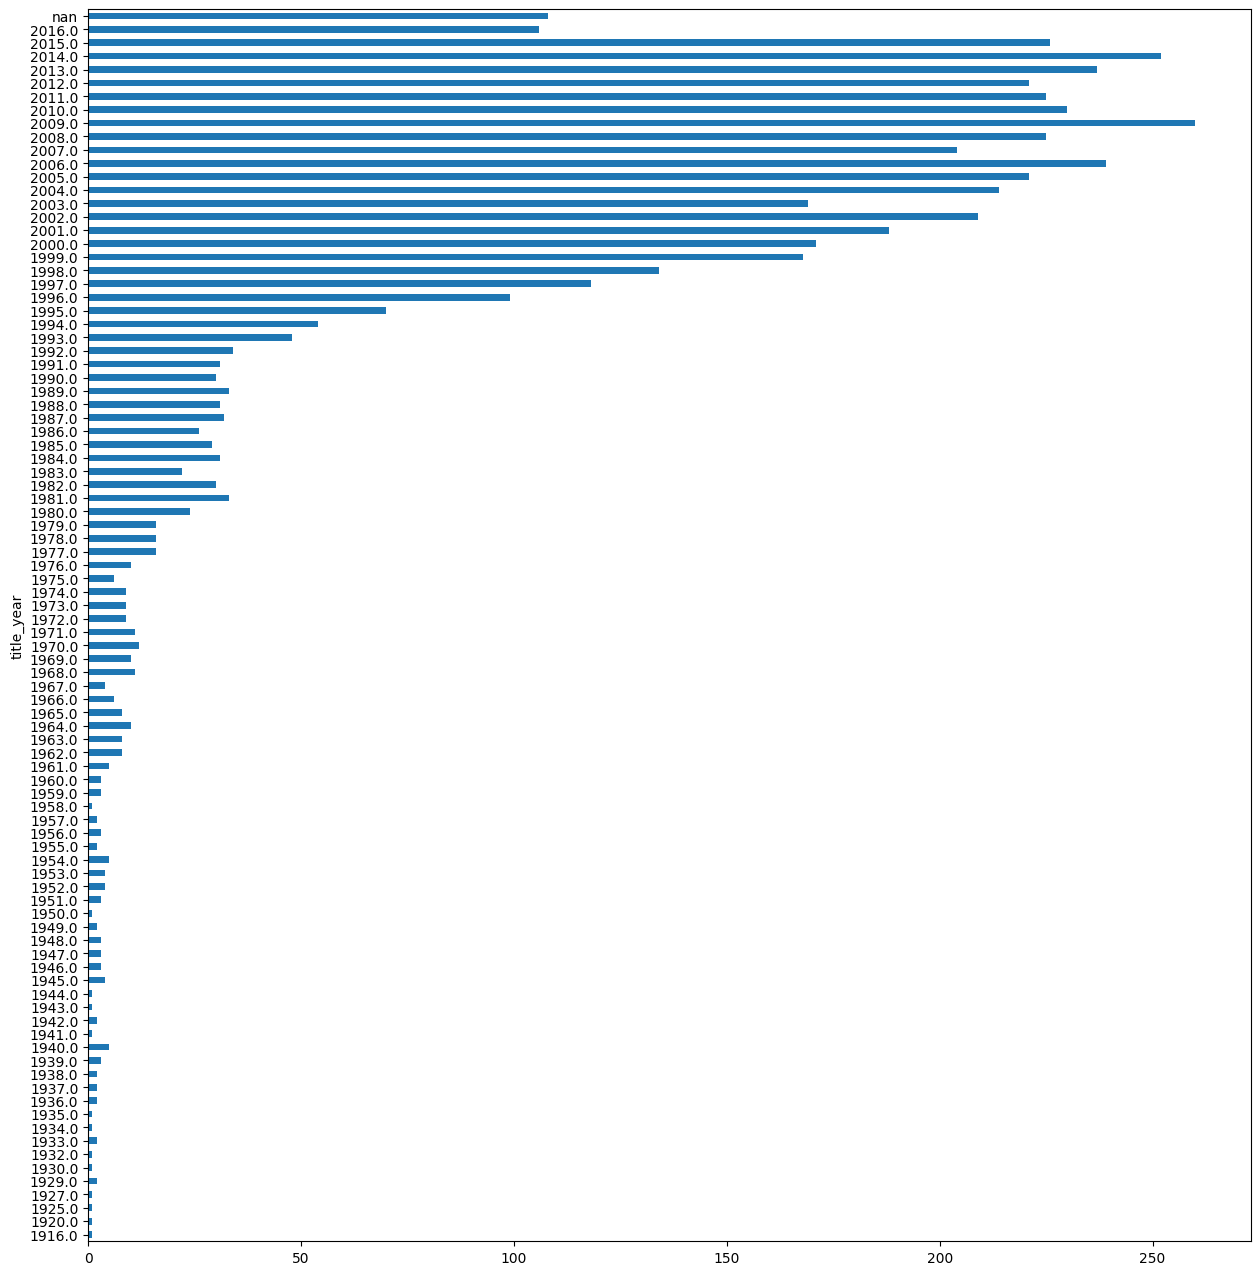

In [8]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [9]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [10]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [11]:
data['actor_1_name'] = data['actor_1_name'].replace(np.nan, 'unknown')
data['actor_2_name'] = data['actor_2_name'].replace(np.nan, 'unknown')
data['actor_3_name'] = data['actor_3_name'].replace(np.nan, 'unknown')
data['director_name'] = data['director_name'].replace(np.nan, 'unknown')

In [12]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling


In [13]:
data['genres'] = data['genres'].str.replace('|', ' ')

In [14]:
data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,Signed Sealed Delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,The Following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,A Plague So Pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,Shanghai Calling


In [15]:
data['movie_title'] = data['movie_title'].str.lower()

In [16]:
# null terminating char at the end
data['movie_title'][1]

"pirates of the caribbean: at world's end\xa0"

In [17]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [18]:
data['movie_title'][1]

"pirates of the caribbean: at world's end"

In [19]:
data.to_csv('data.csv',index=False)

In [20]:
with ZipFile('/content/credits.csv.zip', 'r') as zip_ref:
   zip_ref.extractall()

In [21]:
credits = pd.read_csv('/content/credits.csv')

In [22]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [23]:
with ZipFile('/content/movies_metadata.csv.zip', 'r') as zip_ref:
   zip_ref.extractall()

In [24]:
meta = pd.read_csv('/content/movies_metadata.csv')

/tmp/ipython-input-24-4192473601.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('/content/movies_metadata.csv')


In [25]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')
meta['year'] = meta['release_date'].dt.year
meta['year'].value_counts().sort_index()

,count
year,
1874.0,1
1878.0,1
1883.0,1
1887.0,1
1888.0,2
...,...
2015.0,1905
2016.0,1604
2017.0,532


In [26]:
# Getting only 2017 movies as we already have movies up to the year 2016 in preprocessing 1 file.
# We don't have enough data for the movies from 2018, 2019 and 2020.
# We'll deal with it in the upcoming preprocessing files
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [27]:
new_meta

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0
...,...,...,...,...
45398,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",468707,Thick Lashes of Lauri Mäntyvaara,2017.0
45417,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",461297,Cop and a Half: New Recruit,2017.0
45437,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",455661,In a Heartbeat,2017.0
45453,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",404604,Mom,2017.0


In [28]:
new_meta['id'] = new_meta['id'].astype(int)


In [29]:
data = pd.merge(new_meta, credits, on='id')

In [30]:
pd.set_option('display.max_colwidth', 75)
data

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': ...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Sparrow', 'credit_id': '52fe...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'department': 'Production', ..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Batman', 'credit_id': '535e...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'department': 'Production', ..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', 'credit_id': '545d46a80e0a...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'department': 'Writing', 'ge..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': ...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / Star-Lord', 'credit_id': '5...","[{'credit_id': '59171547925141583c0315a6', 'department': 'Sound', 'gend..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}, {'id': 12...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV', 'credit_id': '5431dd580e...","[{'credit_id': '5431de49c3a36825d300007e', 'department': 'Directing', '..."
...,...,...,...,...,...,...
526,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",468707,Thick Lashes of Lauri Mäntyvaara,2017.0,"[{'cast_id': 0, 'character': 'Satu', 'credit_id': '597e2086c3a368544001...","[{'credit_id': '597e22f69251415d7801c74a', 'department': 'Directing', '..."
527,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}, {'id': 28, ...",461297,Cop and a Half: New Recruit,2017.0,"[{'cast_id': 0, 'character': 'Detective Simmons', 'credit_id': '593ba04...","[{'credit_id': '593ba0c29251410593009be3', 'department': 'Writing', 'ge..."
528,"[{'id': 10751, 'name': 'Family'}, {'id': 16, 'name': 'Animation'}, {'id...",455661,In a Heartbeat,2017.0,[],"[{'credit_id': '5981a15c92514151e0011b51', 'department': 'Sound', 'gend..."
529,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, '...",404604,Mom,2017.0,"[{'cast_id': 1, 'character': 'Devki Sabarwal', 'credit_id': '577809adc3...","[{'credit_id': '58ee55bbc3a3683df500bd0f', 'department': 'Sound', 'gend..."


In [31]:
# evaluates an expression node or a string containing a Python literal or container display
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [32]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.nan
    else:
        return (st.join(gen))

In [33]:
data['genres_list'] = data['genres'].map(lambda x: make_genresList(x))

In [34]:
data['genres_list']

,genres_list
0,Adventure Action Fantasy Comedy
1,Action Adventure Fantasy Sci-Fi
2,Action Adventure Fantasy Sci-Fi
3,Action Adventure Comedy Sci-Fi
4,Fantasy Action Adventure
...,...
526,Romance Comedy
527,Crime Comedy Action Family
528,Family Animation Romance Comedy
529,Crime Drama Thriller


In [35]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.nan
    else:
        return (casts[0])

In [36]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))

In [37]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.nan
    else:
        return (casts[1])

In [38]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))

In [39]:
data['actor_2_name']

,actor_2_name
0,Javier Bardem
1,Henry Cavill
2,Tom Hiddleston
3,Zoe Saldana
4,William Hurt
...,...
526,Rosa Honkonen
527,Wallace Shawn
528,NaN
529,Sajal Ali


In [40]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.nan
    else:
        return (casts[2])

In [41]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))

In [42]:
data['actor_3_name']

,actor_3_name
0,Geoffrey Rush
1,Gal Gadot
2,Cate Blanchett
3,Dave Bautista
4,Benjamin Walker
...,...
526,Tiitus Rantala
527,Gina Holden
528,NaN
529,Akshaye Khanna


In [43]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.nan
    else:
        return (st.join(dt))
data['director_name'] = data['crew'].map(lambda x: get_directors(x))
data['director_name']

,director_name
0,Joachim Rønning Espen Sandberg
1,Zack Snyder
2,Taika Waititi
3,James Gunn
4,Sean McNamara
...,...
526,Hannaleena Hauru
527,Jonathan A. Rosenbaum
528,Beth David Esteban Bravo
529,Ravi Udyawar


In [44]:
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
...,...,...,...,...,...,...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,Thick Lashes of Lauri Mäntyvaara
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,Cop and a Half: New Recruit
528,Beth David Esteban Bravo,NaN,NaN,NaN,Family Animation Romance Comedy,In a Heartbeat
529,Ravi Udyawar,Sridevi Kapoor,Sajal Ali,Akshaye Khanna,Crime Drama Thriller,Mom


In [45]:
movie.isna().sum()

,0
director_name,4
actor_1_name,22
actor_2_name,55
actor_3_name,70
genres_list,7
title,0


In [46]:
movie = movie.dropna(how='any')

In [47]:
movie.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres_list,0
title,0


In [48]:
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [49]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [50]:
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [51]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachim Rønning Espen Sandberg ...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder Action Adventure Fantasy...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett Taika Waititi Action Adve...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gunn Action Adventure Comed...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Sean McNamara Fantasy Actio...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [52]:
old = pd.read_csv('/content/data.csv')

In [53]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens
...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling


In [54]:
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']

In [55]:
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott Smith Comedy Drama
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknown Crime Drama Mystery Thr...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benjamin Roberds Drama Horror ...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsia Comedy Drama Romance


In [56]:
new = pd.concat([old, movie], ignore_index=True)

In [57]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5496,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5497,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5498,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5499,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [58]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [59]:
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5496,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield Jim Strouse Romance Comedy
5497,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Louisa Kelly Farhad Mann Romance
5498,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Hannaleena Hauru Romance Co...
5499,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden Jonathan A. Rosenbaum Cr...


In [60]:
new.to_csv('new_data.csv',index=False)

Extracting features of 2018 movies from Wikipedia

In [61]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [62]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [63]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2]
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3]
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4]
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5]
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6]
...,...,...,...,...,...,...
245,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",[238]
246,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions / Mosaic Media Group,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[142]
247,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[117]
248,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[207]


In [64]:
  !pip install tmdbv3api

In [65]:
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = 'f7a140679c93b137c2879b1682284343'

In [66]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x):
    genres = []
    result = tmdb_movie.search(x)
    movie_id = result[0].id
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json = response.json()
    if data_json['genres']:
        genre_str = " "
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.nan

In [67]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / Stage 6 Films,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",[2],Horror Thriller
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,[3],Thriller Drama
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",[4],Action Thriller Mystery
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",[5],Thriller Action Crime
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,[6],Action Crime Thriller
...,...,...,...,...,...,...,...
245,D E C E M B E R,21,Second Act,STX Entertainment,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",[238],Romance Comedy
246,D E C E M B E R,25,Holmes & Watson,Columbia Pictures / Gary Sanchez Productions / Mosaic Media Group,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",[142],Drama Mystery Thriller Crime
247,D E C E M B E R,25,Vice,Annapurna Pictures / Plan B Entertainment,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",[117],Action Thriller Crime
248,D E C E M B E R,25,On the Basis of Sex,Focus Features,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",[207],Drama History


In [68]:
df_2018 = df[['Title','Cast and crew','genres']]
df_2018

,Title,Cast and crew,genres
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Thriller
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,Thriller Drama
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",Action Thriller Mystery
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",Thriller Action Crime
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action Crime Thriller
...,...,...,...
245,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",Romance Comedy
246,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Drama Mystery Thriller Crime
247,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Action Thriller Crime
248,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History


In [69]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))

/tmp/ipython-input-69-699914053.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))


In [70]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])
df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))

/tmp/ipython-input-70-3171825973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_1_name'] = df_2018['Cast and crew'].map(lambda x: get_actor1(x))


In [71]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

/tmp/ipython-input-71-1015988020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))


In [72]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,"Adam Robitel (director); Leigh Whannell (screenplay); Lin Shaye, Angus ...",Horror Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Christopher Radcliff (director/screenplay); Lauren Wolkstein (director)...,Thriller Drama,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,The Commuter,"Jaume Collet-Serra (director); Byron Willinger, Philip de Blasi, Ryan E...",Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
3,Proud Mary,"Babak Najafi (director); John S. Newman, Christian Swegal, Steve Antin ...",Thriller Action Crime,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzanatto (screenplay); Bruce ...,Action Crime Thriller,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore
...,...,...,...,...,...,...,...
245,Second Act,"Peter Segal (director); Justin Zackham, Elaine Goldsmith-Thomas (screen...",Romance Comedy,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens
246,Holmes & Watson,"Etan Cohen (director/screenplay); Will Ferrell, John C. Reilly, Rebecca...",Drama Mystery Thriller Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
247,Vice,"Adam McKay (director/screenplay); Christian Bale, Amy Adams, Steve Care...",Action Thriller Crime,Adam McKay,Christian Bale,Amy Adams,Steve Carell
248,On the Basis of Sex,"Mimi Leder (director); Daniel Stiepleman (screenplay); Felicity Jones, ...",Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux


In [73]:
df_2018 = df_2018.rename(columns={'Title':'movie_title'})

In [74]:
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Thriller,Insidious: The Last Key
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,Proud Mary
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,Acts of Violence
...,...,...,...,...,...,...
245,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,Romance Comedy,Second Act
246,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Drama Mystery Thriller Crime,Holmes & Watson
247,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Action Thriller Crime,Vice
248,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,On the Basis of Sex


In [75]:
new_df18['actor_2_name'] = new_df18['actor_2_name'].replace(np.nan, 'unknown')
new_df18['actor_3_name'] = new_df18['actor_3_name'].replace(np.nan, 'unknown')
new_df18['movie_title'] = new_df18['movie_title'].str.lower()
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']

In [76]:
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Robitel Horror Thriller
1,Christopher Radcliff (director/screenplay); Lauren Wolkstein,Lauren Wolkstein (director); Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Lauren Wolkstein (director); Alex Pettyfer James Freedson-Jackson Emily...
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume Collet-Serra Action Thril...
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,proud mary,Taraji P. Henson Jahi Di'Allo Winston Billy Brown Babak Najafi Thriller...
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Crime Thriller,acts of violence,Bruce Willis Cole Hauser Shawn Ashmore Brett Donowho Action Crime Thriller
...,...,...,...,...,...,...,...
245,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,Romance Comedy,second act,Jennifer Lopez Leah Remini Vanessa Hudgens Peter Segal Romance Comedy
246,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Drama Mystery Thriller Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan Cohen Drama Mystery Thril...
247,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Action Thriller Crime,vice,Christian Bale Amy Adams Steve Carell Adam McKay Action Thriller Crime
248,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mimi Leder Drama History


Extracting features of 2019 movies from Wikipedia

In [77]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [78]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [79]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",[2]
1,J A N U A R Y,4,Rust Creek,IFC Films / Lunacy Productions,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",[3]
2,J A N U A R Y,4,American Hangman,Hangman Justice Productions,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",[4]
3,J A N U A R Y,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,[5]
4,J A N U A R Y,11,The Upside,STX Entertainment,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",[6]
...,...,...,...,...,...,...
245,D E C E M B E R,25,Spies in Disguise,20th Century Fox Animation / Blue Sky Studios / Chernin Entertainment,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",[133]
246,D E C E M B E R,25,Little Women,Columbia Pictures / Regency Enterprises,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",[226]
247,D E C E M B E R,25,1917,Universal Pictures / DreamWorks Pictures,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,[227]
248,D E C E M B E R,25,Just Mercy,Warner Bros. Pictures / Participant,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",[228]


In [80]:
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [81]:
df_2019 = df[['Title','Cast and crew','genres']].copy()

In [82]:
df_2019

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria Melnik (screenplay); Tay...",Horror Thriller Mystery
1,Rust Creek,"Jen McGowan (director); Julie Lipson (screenplay); Hermione Corfield, J...",Thriller Drama Action Crime
2,American Hangman,"Wilson Coneybeare (director/screenplay); Donald Sutherland, Vincent Kar...",Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Cameron (screenplay); Bryce D...,Drama Adventure Family
4,The Upside,"Neil Burger (director); Jon Hartmere (screenplay); Bryan Cranston, Kevi...",Comedy Drama
...,...,...,...
245,Spies in Disguise,"Nick Bruno, Troy Quane (directors); Brad Copeland (screenplay); Will Sm...",Animation Action Adventure Comedy Family
246,Little Women,"Greta Gerwig (director/screenplay); Saoirse Ronan, Emma Watson, Florenc...",Drama Family
247,1917,Sam Mendes (director/screenplay); Krysty Wilson-Cairns (screenplay); Ge...,War History Thriller Drama
248,Just Mercy,"Destin Daniel Cretton (director/screenplay), Andrew Lanham (screenplay)...",Drama Crime History


In [83]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [84]:
df_2019['director_name'] = df_2019['Cast and crew'].map(lambda x: get_director(str(x)))

In [85]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [86]:
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))

In [87]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [88]:
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))

In [89]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [90]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))
df_2019 = df_2019.rename(columns={'Title':'movie_title'})

In [91]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [92]:
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')
new_df19['movie_title'] = new_df19['movie_title'].str.lower()
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']

In [93]:
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Mystery,escape room,Taylor Russell Logan Miller Deborah Ann Woll Adam Robitel Horror Thrill...
1,Jen McGowan,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama Action Crime,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Jen McGowan Thriller Drama A...
2,Wilson Coneybeare,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver Dennis Wilson Coneybeare Th...
3,Charles Martin Smith,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexandra Shipp Charles Martin S...
4,Neil Burger,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Neil Burger Comedy Drama
...,...,...,...,...,...,...,...
245,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,"Will Smith Tom Holland Rashida Jones Nick Bruno, Troy Quane Animation A..."
246,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Family,little women,Saoirse Ronan Emma Watson Florence Pugh Greta Gerwig Drama Family
247,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War History Thriller Drama,1917,George MacKay Dean-Charles Chapman Mark Strong Sam Mendes War History T...
248,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Destin Daniel Cretton Drama Cr...


In [94]:
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [95]:
my_df = pd.concat([new_df18, new_df19], ignore_index=True)

In [96]:
final_df = pd.concat([new, my_df],ignore_index=True)

In [97]:
final_df.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,1
actor_3_name,17
genres,3
movie_title,0
comb,252


In [98]:
final_df.to_csv('final_data.csv', index=False)

Extracting features of 2020 movies from Wikipedia

In [99]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

In [100]:
import urllib.request
import bs4 as bs

source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [101]:
tables = soup.find_all('table',class_='wikitable sortable')

In [102]:
len(tables)

4

In [103]:
type(tables[0])

bs4.element.Tag

In [104]:
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0]

/tmp/ipython-input-104-2807297294.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df1 = pd.read_html(str(tables[0]))[0]
/tmp/ipython-input-104-2807297294.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df2 = pd.read_html(str(tables[1]))[0]
/tmp/ipython-input-104-2807297294.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df3 = pd.read_html(str(tables[2]))[0]
/tmp/ipython-input-104-2807297294.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df4 = pd.read_html(str(tables[3]).replace(

In [105]:
df = pd.concat([df1,df2,df3,df4], ignore_index=True)



In [106]:
df

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pictures,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...",[2]
1,J A N U A R Y,10,Underwater,20th Century Fox / TSG Entertainment / Chernin Entertainment,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",[3]
2,J A N U A R Y,10,Like a Boss,Paramount Pictures / Artists First,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",[4]
3,J A N U A R Y,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,NaN
4,J A N U A R Y,10,Inherit the Viper,Lionsgate / Barry Films / Tycor International Film Company,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...",[5]
...,...,...,...,...,...,...
273,D E C E M B E R,25,We Can Be Heroes,Netflix / Troublemaker Studios / Double R Productions,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...",[246]
274,D E C E M B E R,25,News of the World,Universal Pictures / Playtone / Perfect World Pictures,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,[247]
275,D E C E M B E R,25,One Night in Miami...,Amazon Studios,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",[248]
276,D E C E M B E R,25,Promising Young Woman,Focus Features / FilmNation Entertainment,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...",[249]


In [107]:
df_2020 = df[['Title','Cast and crew']]

In [108]:
df_2020

,Title,Cast and crew
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,..."
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,..."
...,...,...
273,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa..."
274,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...
275,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El..."
276,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis..."


In [109]:
from tmdbv3api import TMDb, Movie

tmdb = TMDb()
tmdb.api_key = 'f7a140679c93b137c2879b1682284343'

movie = Movie()

def get_genre(title):
    search = movie.search(title)
    if search:
        first_result = search[0]
        genre_ids = first_result['genre_ids']
        # map genre_ids to names using a genre lookup
        return genre_ids
    return "Unknown"


In [110]:
from tmdbv3api import TMDb, Movie, Genre

tmdb = TMDb()
tmdb.api_key = 'f7a140679c93b137c2879b1682284343'  # replace with your actual key

movie = Movie()
genre = Genre()

# Corrected line to get genre mapping
genre_dict = {g['id']: g['name'] for g in genre.movie_list()}

def get_genre(title):
    try:
        search = movie.search(title)
        if not search:
            return "Unknown"
        genre_ids = search[0]['genre_ids']
        genre_names = [genre_dict.get(gid, 'Unknown') for gid in genre_ids]
        return ", ".join(genre_names)
    except Exception as e:
        print(f"Error for title '{title}': {e}")
        return "Unknown"


In [111]:
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))


Error for title 'No films had been released on this date as resulting the closure of theaters caused by the COVID-19 pandemic': attribute name must be string, not 'int'
Error for title 'The SpongeBob Movie: Sponge on the Run (Canadian theatrical release)': attribute name must be string, not 'int'


/tmp/ipython-input-111-1493243292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))


In [112]:
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [113]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))

/tmp/ipython-input-113-3848435694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))


In [114]:
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])

In [115]:
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))

/tmp/ipython-input-115-3646981363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))


In [116]:
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])

In [117]:
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))

In [118]:
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])

In [119]:
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [120]:
df_2020

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,"Nicolas Pesce (director/screenplay); Andrea Riseborough, Demián Bichir,...","Horror, Mystery, Thriller",Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Adam Cozad (screenplay); Kri...",Drama,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Cole-Kelly (screenplay); Tif...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian (screenplay); Richard Ge...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,"Anthony Jerjen (director); Andrew Crabtree (screenplay); Josh Hartnett,...","Crime, Thriller, Drama",Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs
...,...,...,...,...,...,...,...
273,We Can Be Heroes,"Robert Rodriguez (director/screenplay); Priyanka Chopra Jonas, Pedro Pa...","Family, Action, Fantasy, Comedy",Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin
274,News of the World,Paul Greengrass (director/screenplay); Luke Davies (screenplay); Tom Ha...,"Drama, Western, Adventure",Paul Greengrass,Tom Hanks,Helena Zengel,NaN
275,One Night in Miami...,"Regina King (director); Kemp Powers (screenplay); Kingsley Ben-Adir, El...",Drama,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge
276,Promising Young Woman,"Emerald Fennell (director/screenplay); Carey Mulligan, Bo Burnham, Alis...","Thriller, Crime, Drama",Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie


In [121]:
df_2020 = df_2020.rename(columns={'Title':'movie_title'})

In [122]:
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,"Horror, Mystery, Thriller",The Grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Drama,Underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,Like a Boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,Three Christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,"Crime, Thriller, Drama",Inherit the Viper
...,...,...,...,...,...,...
273,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,"Family, Action, Fantasy, Comedy",We Can Be Heroes
274,Paul Greengrass,Tom Hanks,Helena Zengel,NaN,"Drama, Western, Adventure",News of the World
275,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,One Night in Miami...
276,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,"Thriller, Crime, Drama",Promising Young Woman


In [123]:
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']

In [124]:
new_df20.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,5
actor_3_name,28
genres,0
movie_title,0
comb,28


In [125]:
new_df20 = new_df20.dropna(how='any')

In [126]:
new_df20.isna().sum()

,0
director_name,0
actor_1_name,0
actor_2_name,0
actor_3_name,0
genres,0
movie_title,0
comb,0


In [127]:
new_df20['movie_title'] = new_df20['movie_title'].str.lower()

/tmp/ipython-input-127-2267385682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df20['movie_title'] = new_df20['movie_title'].str.lower()


In [128]:
new_df20

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,"Horror, Mystery, Thriller",the grudge,"Andrea Riseborough Demián Bichir John Cho Nicolas Pesce Horror, Mystery..."
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Drama,underwater,Kristen Stewart Vincent Cassel Jessica Henwick William Eubank Drama
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel Arteta Comedy
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon Avnet Drama
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,"Crime, Thriller, Drama",inherit the viper,"Josh Hartnett Margarita Levieva Chandler Riggs Anthony Jerjen Crime, Th..."
...,...,...,...,...,...,...,...
272,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,"Animation, Family, Comedy, Fantasy",soul,"Jamie Foxx Tina Fey Graham Norton Pete Docter Animation, Family, Comedy..."
273,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,"Family, Action, Fantasy, Comedy",we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Famil...
275,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
276,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,"Thriller, Crime, Drama",promising young woman,"Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller, Crime, ..."


In [129]:
old_df = pd.read_csv('final_data.csv')

In [130]:
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
5859,"Nick Bruno, Troy Quane",Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,Spies in Disguise,NaN
5860,Greta Gerwig,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Family,Little Women,NaN
5861,Sam Mendes,George MacKay,Dean-Charles Chapman,Mark Strong,War History Thriller Drama,1917,NaN
5862,Destin Daniel Cretton,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,Just Mercy,NaN


In [131]:
final_df = pd.concat([old_df,new_df20],ignore_index=True)
final_df



,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James Cameron Action Adventure F...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore Verbinski Action Adventur...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman Sam Mendes Action Adventu...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt Christopher Nolan Action ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Documentary
...,...,...,...,...,...,...,...
6109,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,"Animation, Family, Comedy, Fantasy",soul,"Jamie Foxx Tina Fey Graham Norton Pete Docter Animation, Family, Comedy..."
6110,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,"Family, Action, Fantasy, Comedy",we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gosselin Robert Rodriguez Famil...
6111,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina King Drama
6112,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,"Thriller, Crime, Drama",promising young woman,"Carey Mulligan Bo Burnham Alison Brie Emerald Fennell Thriller, Crime, ..."


In [132]:
final_df.to_csv('main_data.csv',index=False)

In [133]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [134]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [135]:
dataset = pd.read_csv('reviews.txt',sep = '\t', names =['Reviews','Comments'])

In [136]:
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Re..."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, I am reminded of how much..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [137]:
stopset = stopwords.words('english')

In [138]:
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)

In [139]:
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('tranform.pkl', 'wb'))

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [141]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [142]:

accuracy_score(y_test,clf.predict(X_test))*100

97.47109826589595

In [143]:
clf = naive_bayes.MultinomialNB()
clf.fit(X,y)

MultinomialNB()

In [144]:
accuracy_score(y_test,clf.predict(X_test))*100

98.77167630057804

In [145]:
filename = 'nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))